# Airline Passenger Satisfaction Analysis
*Eine datengetriebene Analyse der Passagierzufriedenheit im Luftverkehr*

---

**Erstellt von:** Hasan Hüseyin Demirci, Andreas Hubertus, Sebastian Rein, Vitalii Solonychnyi  

**Modul:** Grundlagen Data Science und Künstliche Intelligenz 1

**Dozentin:** Prof. Dr. Jennifer Schoch  

**Hochschule:** Duale Hochschule Baden-Württemberg Karlsruhe

**Datum:** 22.11.2025

---

## Inhaltsverzeichnis

1. [Einleitung](#einleitung)  
    1.1 [Motivation und Business Understanding](#motivation-und-business-understanding)  
    1.2 [Zielsetzung](#zielsetzung)

2. [Data Understanding](#data-understanding)  
    2.1 [Datenbeschreibung](#datenbeschreibung)
    2.2 Übersicht und Relevanz der Variablen

3. [Data Preparation]

4. Benfords Law – Überprüfung des Datensatzes

5. Korrelationen 
### 5.1 (a) Auswahl geeigneter Korrelationskoeffizienten


6. 


# 1. Einleitung


#### 1.1 Motivation

Die Zufriedenheit von Flugpassagieren ist ein entscheidender Faktor für die Kundenbindung und das Markenimage von Fluggesellschaften. Sie haben daher ein großes Interesse daran, herauszufinden, wie genau die Zufriedenheit des Kunden gesteigert werden kann.

Das Thema wurde bereits internsiv erforscht, zum Beispiel in der Studie "Passenger satisfaction with airline service quality in Malaysia: A structural equation modeling approach" (Quelle: https://www.sciencedirect.com/science/article/pii/S2210539514000108) . Hier wird die Zufriedenheit von Passagieren bei Malaysia Airlines analysier

Das Thema wurde bereits internsiv erforscht, zum Beispiel in der Studie "Prediction of US airline passenger satisfaction using machine learning algorithms" (Quelle: https://pdfs.semanticscholar.org/23a5/760607a9db8b6860a99fa0d97d1535854c62.pdf). Hier wird mithilfe von Machine Learning versucht vorherzusagen, ob ein Passagier zufrieden oder unzufrieden sein wird.  

#### 1.2 Zielsetzung


Die zentrale Forschungsfrage dieser Analyse lautet daher:
*Welche Faktoren beeinflussen die Gesamtzufriedenheit eines Flugpassagiers am meisten und inwiefern korrelieren die einzelenen Faktoren miteinander?*


Der Datensatz "Airline Passenger Satisfaction", der auf Kaggle zur Verfügung steht, ist hierfür die Grundlage.
Er kann über folgenden Link aufgerufen, gedownloaded und ausgelesen werden:

https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data

Die Analyse läuft auf Grundlage des CRISP-DM Prozesses, einem standardisierten Vorgehensmodell für Data Science-Projekte.

Zu Beginn des Projekts wurde eine sogenannte SMART-Zielsetzung festgelegt:

- Specific: Eine präzise Forschungsfrage wurde formuliert.  
- Measurable: Die Korrelationskoeffizienten ausgewählter Faktoren werden betrachtet, um ihren Einfluss zu bewerten und zu vergleichen.  
- Achievable: Python mit grundlegenden Funktionen der Bibliotheken NumPy, Pandas und Matplotlib wird genutzt und dem CRISP-DM-Modell wird gefolgt.  
- Realistic: Der Datensatz wird auf Glaubwürdigkeit überprüft und seine Aussagekraft wird eingeschätzt.  
- Time-bound: Die Abgabefrist dieses Notebooks ist der 23.11.2025 und das mündliche Prüfungsgespräch findet am 01.12.2025 statt.




# 2. Data Understanding

#### 2.1 Grundlegende Struktur des Datensatzes

In [243]:
import pandas as pd             # Pandas ermöglicht das Laden, Bereinigen und Analysieren von Datenmengen

df = pd.read_csv("train.csv")   # Die Datei "train.cvs" wird eingelesen
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [244]:
rows, cols = df.shape
print("Zeilen:", rows)
print("Spalten:", cols)

Zeilen: 103904
Spalten: 25


Der Datensatz umfasst Informationen zu 103.904 Flugpassagieren, die anhand von 25 Spalten hinsichtlich ihrer Merkmale und persönlichen Bewertungen erfasst wurden.

In [245]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Die Daten wurden durch eine Passagierumfrage erhoben.
Auffällig ist nach erster Betrachtung, dass die Befragten in einer ALtersspanne von 7 bis 85 liegen. Außerdem ist der Faktor, den Gäste durchschnittlich am meisten bemängeln, der Inflight wifi service. Obwohl nur ca. 103.000 Personen im Datensatz hinterlegt sind, erstrecken sich die IDs von 1 bis 129.000. Dies lässt darauf schließen, dass Zeilen übersprungen wurden und nicht alle erfassten Personen im Datensatz hinterlegt sind. 

### 2.2 Übersicht und Relevanz der Variablen

Zum einen sind persönliche Merkmale berücksichtigt, wie das Geschlecht (gender) oder das Alter (age) sowie die geflogene Klasse (class) oder die Art der Reise (type of travel). 
Zum anderen sind Bewertungen auf einer Skala von 1 bis 5 erkennbar, beispielsweise bezüglich der Verpflegung an Bord (food and drink) oder dem Umgang des Personals mit Gepäcksstücken (baggage handling).
Eine Bewertung mit 0 bedeutet, dass der entsprechende Dienst nicht genutzt wurde. Dies muss später bei der Data Preparation berücksichtigt werden.

Jede Variable ist entweder nominal, kardinal oder ordinal skaliert. Hier ist eine Auflistung aller Variablen samt ihrer Skalenniveaus:


| Merkmal                          | Bedeutung                                                | Skalenniveau |
|----------------------------------|----------------------------------------------------------|--------------|
| Unnamed: 0                       | Technische Index-Spalte (CSV-Export)                     | -            |
| id                               | Eindeutige Passagier-ID                                  | -            |
| Gender                           | Geschlecht des Passagiers                                | nominal      |
| Customer Type                    | Neukunde oder Bestandskunde                              | nominal      |
| Age                              | Alter in Jahren                                          | kardinal     |
| Type of Travel                   | Grund der Reise (Business / Personal)                    | nominal      |
| Class                            | Reiseklasse (Economy, Eco Plus, Business)                | ordinal      |
| Flight Distance                  | Flugdistanz in Meilen                                    | kardinal     |
| Inflight wifi service            | Bewertung des WLAN (1 = schlecht, 5 = sehr gut)          | ordinal      |
| Departure/Arrival time convenient| Bewertung der Zeitplanung (1–5)                          | ordinal      |
| Ease of Online booking           | Bewertung der Online-Buchung (1–5)                       | ordinal      |
| Gate location                    | Bewertung der Gate-Lage (1–5)                            | ordinal      |
| Food and drink                   | Bewertung von Essen & Trinken an Bord (1–5)              | ordinal      |
| Online boarding                  | Bewertung des Online-Boardings (1–5)                     | ordinal      |
| Seat comfort                     | Bewertung der Sitzqualität (1–5)                         | ordinal      |
| Inflight entertainment           | Bewertung des Bord-Entertainments (1–5)                  | ordinal      |
| On-board service                 | Bewertung des Kabinenservices (1–5)                      | ordinal      |
| Leg room service                 | Bewertung der Beinfreiheit (1–5)                         | ordinal      |
| Baggage handling                 | Bewertung der Gepäckabfertigung (1–5)                    | ordinal      |
| Checkin service                  | Bewertung des Check-in-Prozesses (1–5)                   | ordinal      |
| Inflight service                 | Bewertung des Service während des Flugs (1–5)            | ordinal      |
| Cleanliness                      | Bewertung der Sauberkeit (1–5)                           | ordinal      |
| Departure Delay in Minutes       | Abflugverspätung in Minuten                              | kardinal     |
| Arrival Delay in Minutes         | Ankunftsverspätung in Minuten                            | kardinal     |
| satisfaction                     | Zufriedenheit: satisfied / neutral or dissatisfied       | nominal      |


Bei allen Variablen ist durch die Spaltennamen intuitiv klar, welche Informationen daraus gewonnen werden können. 

Für die zentrale Fragestellung, welche Merkmale die Zufriedenheit der Passagiere stark beeinflussen, ist das Zielmerkmal also satisfaction (satisfied / neutral or dissatisfied).


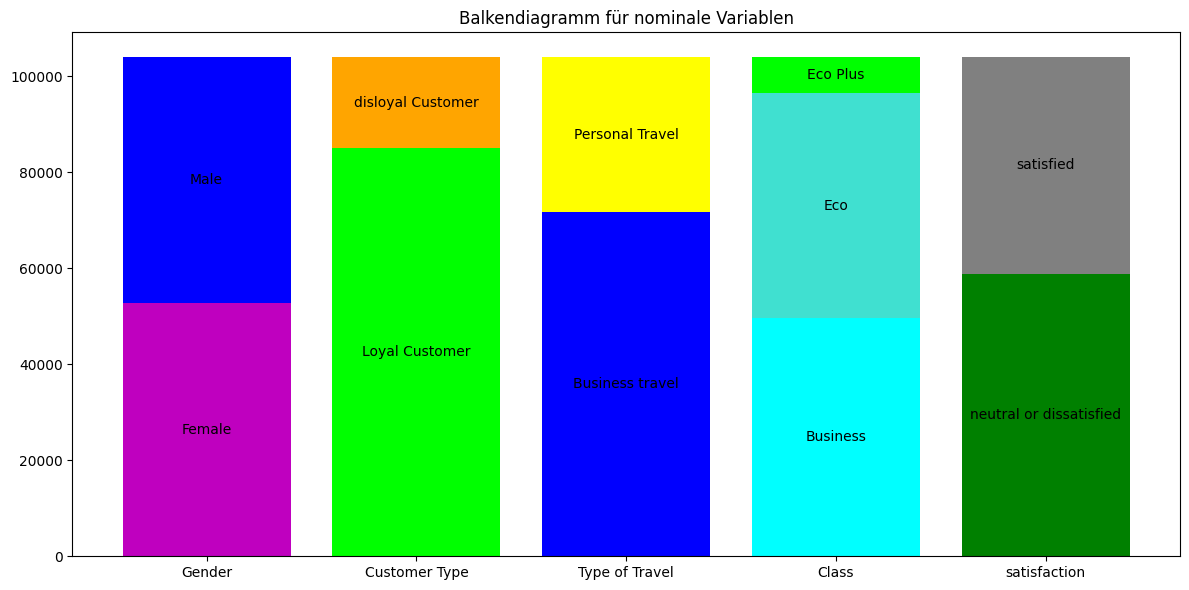

In [246]:
import matplotlib.pyplot as plt

columns = ['Gender','Customer Type', 'Type of Travel', 'Class', 'satisfaction']

x_positions = range(len(columns))

fig, ax = plt.subplots(figsize=[12,6])


palette = {
    'Gender': ['m','b'],
    'Customer Type': ['lime','orange'],
    'Type of Travel': ['blue','yellow'],
    'satisfaction': ['green','gray'],
    'Class': ['cyan', 'turquoise', 'lime']
}

legend_entries = {}

for col_indx, col in enumerate(columns):
    counts = df[col].value_counts()
    bottom = 0
    colors = palette[col]
    
    for i, (cat,val) in enumerate(counts.items()):
        color = colors[i% len(colors)]
        ax.bar(col_indx, val, bottom=bottom, color=color)
        ax.text(col_indx, bottom + val/2, str(cat), ha='center', va='center', color='black')
        bottom += val
        if cat not in legend_entries:
            legend_entries[cat] = color

ax.set_xticks(list(x_positions))
ax.set_xticklabels(columns)

handles = [plt.Rectangle((0,0),1,1, color = color) for color in legend_entries.values()]
labels = list(legend_entries.keys())
plt.title("Balkendiagramm für nominale Variablen")
plt.tight_layout()
plt.show()

Zur Visualisierung der Häufigkeitsverteilungen nominaler Variablen dient ein gestapeltes Balkendiagramm, welches die proportionale Zusammensetzung der Passagiergruppen intuitiv erfassbar macht. 
Die relevanten Erkenntnisse für die weitere Analyse sind:

- Geschlecht: Der Datensatz ist sehr ausgewogen; es gibt fast gleich viele Frauen wie Männer.

- Kundentyp: Hier zeigt sich ein deutliches Ungleichgewicht. Etwa 75 % der -Befragten sind loyale Kunden.

- Klasse: Auch hier ist die Verteilung ungleichmäßig. Die Klasse Eco Plus nimmt im Vergleich zu Eco und Business nur einen verschwindend geringen Anteil ein.

- Reisegrund (Type of Travel): Beim Reisegrund dominiert Business Travel gegenüber Personal Travel mit einem Verhältnis von annähernd 2 zu 1.


Es ist wichtig zu unterscheiden, auf welche Faktoren eine Airline direkten Einfluss nehmen kann. In engem Zusammenhang mit Service, Komfort oder Verspätungen stehen:

- Class  
- Seat comfort  
- Flight Distance  
- Inflight wifi service  
- Food and drink  
- Inflight entertainment  
- Leg room service  
- On-board service  
- Cleanliness  
- Checkin service  
- Baggage handling  
- Departure Delay in Minutes  
- Arrival Delay in Minutes 
- Arrival Delay in Minutes  

Teilweise relevante Merkmale, die zwar die Wahrnehmung eines Passagiers beeinflussen können, aber nicht den Service selbst, sind:

- Age  
- Type of Travel  
- Customer Type  
- Gender  


Die Attribute *id* und *Unnamed: 0* tragen natürlich nicht zur Analyse der Zufriedenheit bei.



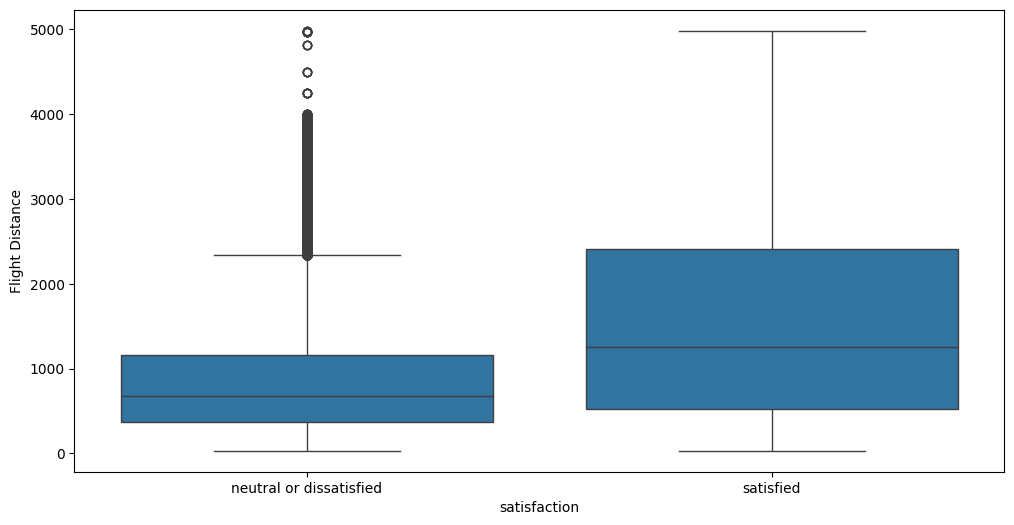

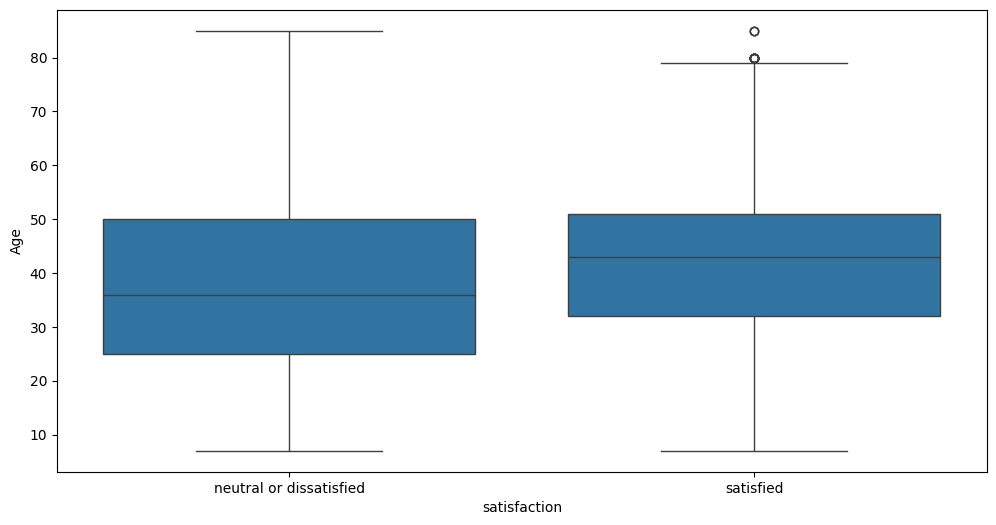

In [247]:
import seaborn as sns
list_boxplot_vars = ["Flight Distance",'Age'] #Liste der Boxplotvariablen
for var in list_boxplot_vars: # Schleife über die Boxplotvariablen
    plt.figure(figsize = [12,6]) # Erstellen der Figur
    sns.boxplot(df, x= 'satisfaction', y=var) # Erstellen des Boxplots
    plt.show() # Anzeigen des Plots

### Analyse des Boxplots zur Flugdistanz

Der Boxplot zeigt, dass zufriedene Passagiere im Median deutlich längere Strecken fliegen. Ihre Distanzverteilung ist breiter und reicht häufiger in höhere Bereiche. Unzufriedene Passagiere liegen überwiegend im Bereich kürzerer Flugstrecken. Insgesamt deutet der Boxplot darauf hin, dass längere Flugdistanzen häufiger mit höherer Zufriedenheit verbunden sind.

### Analyse des Boxplots zum Alter

Der Boxplot zeigt, dass zufriedene Passagiere im Median etwas älter sind als unzufriedene. Beide Gruppen haben jedoch eine breite und stark überlappende Altersverteilung. Insgesamt weist der Boxplot nur auf einen schwachen Zusammenhang zwischen Alter und Zufriedenheit hin.

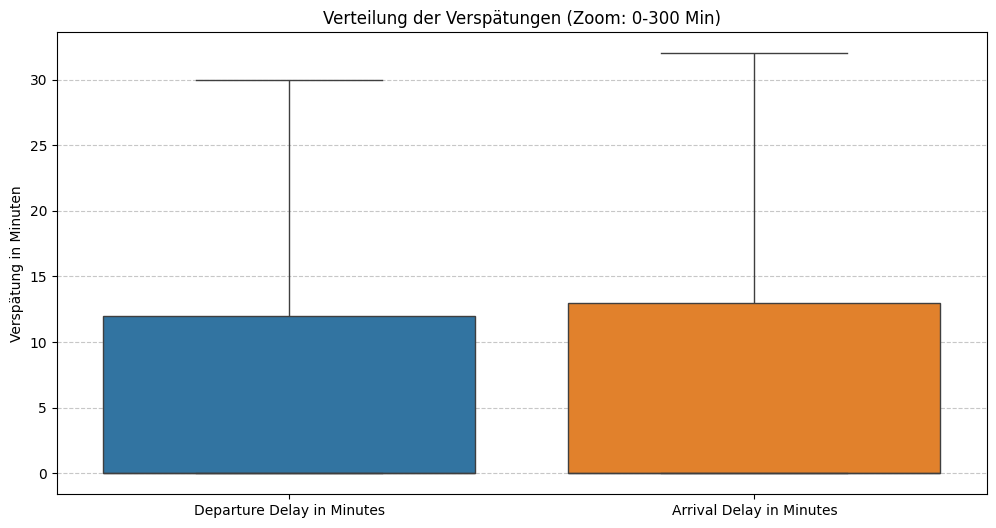

In [248]:
import matplotlib.pyplot as plt

list_delays_vars = ["Departure Delay in Minutes", "Arrival Delay in Minutes"]

plt.figure(figsize=[12,6])

# Boxplot erstellen
sns.boxplot(data=df[list_delays_vars], showfliers=False)


# Beschriftung und Raster für bessere Lesbarkeit
plt.title("Verteilung der Verspätungen (Zoom: 0-300 Min)")
plt.ylabel("Verspätung in Minuten")
plt.grid(axis='y', linestyle='--', alpha=0.7) # Hilfslinien hinzufügen

plt.show()

### Analyse des Boxplots zu den Verspätungen

Der Boxplot zeigt, dass sowohl Abflug- als auch Ankunftsverspätungen überwiegend niedrig sind. Die Medianwerte liegen beide bei 0. Ausreißer wurden an dieser Stelle ausgeblendet, reichen aber bis etwa 1600 Minuten. Beides ist aus der folgenden Tabelle zu entnehmen. 


In [249]:
df[["Departure Delay in Minutes", "Arrival Delay in Minutes"]].describe().loc[["max","50%"]]

,Departure Delay in Minutes,Arrival Delay in Minutes
max,1592.0,1584.0
50%,0.0,0.0


In [250]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

numeric_cols = [e for e in numeric_cols if e != "id" and e != "Unnamed: 0"] # Technische Werte wurden entfernt


summary_stats = pd.DataFrame({
    "Mittelwert": df[numeric_cols].mean(),
    "Median": df[numeric_cols].median(),
    "Streuung (Std)": df[numeric_cols].std()
})
summary_stats

,Mittelwert,Median,Streuung (Std)
Age,39.379706,40.0,15.114964
Flight Distance,1189.448375,843.0,997.147281
Inflight wifi service,2.729683,3.0,1.327829
Departure/Arrival time convenient,3.060296,3.0,1.525075
Ease of Online booking,2.756901,3.0,1.398929
Gate location,2.976883,3.0,1.277621
Food and drink,3.202129,3.0,1.329533
Online boarding,3.250375,3.0,1.349509
Seat comfort,3.439396,4.0,1.319088
Inflight entertainment,3.358158,4.0,1.332991


Die meisten Bewertungen liegen im Durchschnitt zwischen 3 und 4, bei einer geringen Streuung um etwa 1.2–1.4. 
Das zeigt, dass die Bewertungen relativ stabil sind und nur geringe Schwankungen aufweisen.

Der Median liegt fast immer bei 3 oder 4 und damit sehr nahe am Mittelwert. 
Die Verteilungen dieser Merkmale sind also weitgehend symmetrisch.

Flight Distance fällt stark auf: Der Mittelwert ist deutlich höher als der Median und die Streuung ist sehr groß. 


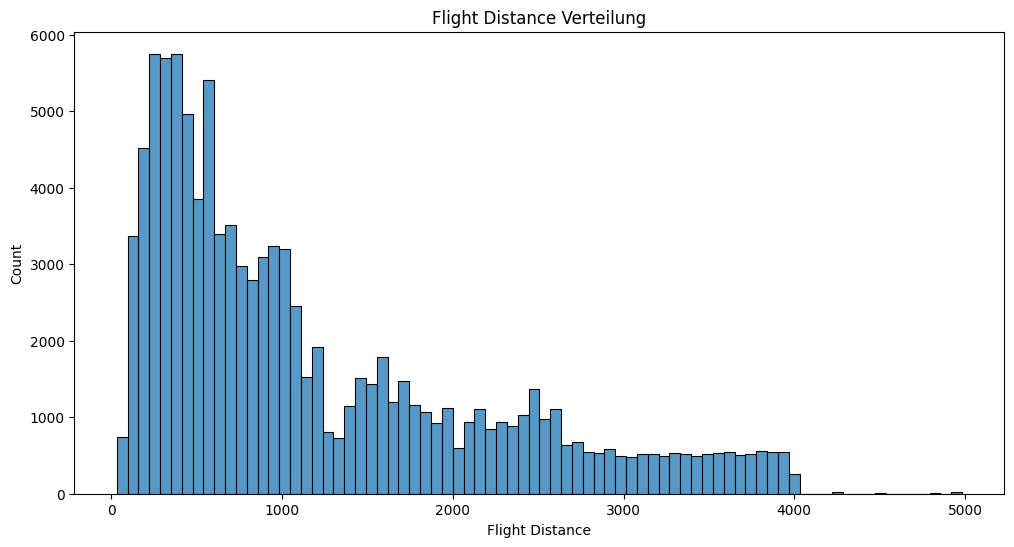

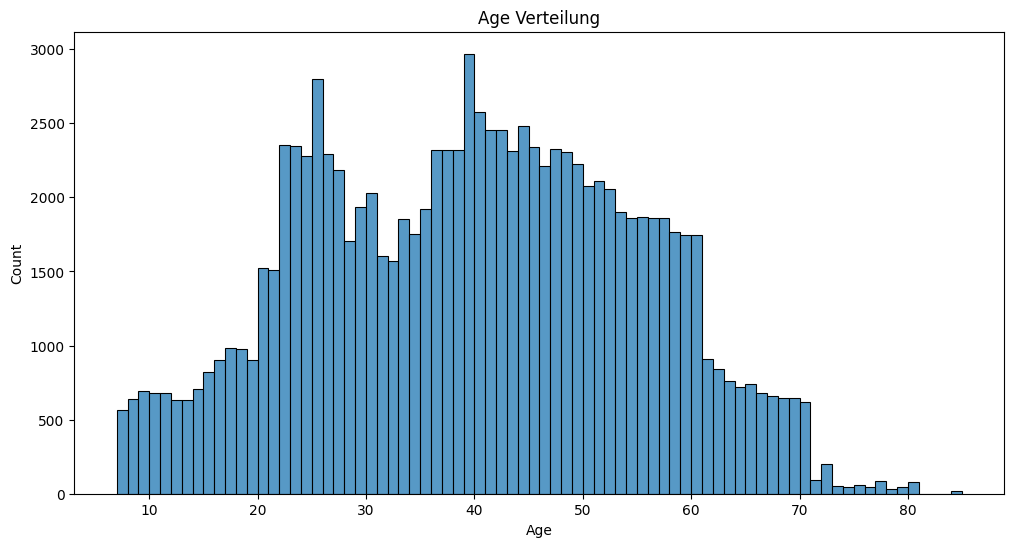

In [251]:
columns = ["Flight Distance","Age"] #Kardinale Variablen

for column in columns: 
    plt.figure(figsize=[12,6]) # Erstellen der Figur
    sns.histplot(df[column], bins = 78) # Erstellen des Histogramms mit 78 Balken
    plt.title(f"{column} Verteilung") 
    plt.show() 

Aus dem Diagramm lässt sich herauslesen, dass ein Großteil aller Flüge unter 1500 Meilen weit ist. Flugdistanzen darüber hinaus sind noch relativ häufig bis ca 4000 Meilen. Längere Flüge sind selten.
Hier sieht man nochmal visuell, dass es einige Bewertungen von unter 10 Jährigen gibt und generell einige Bewertungen von Minderjährigen.
Der Großteil der Beobachteten liegt zwischen 20 und 60. Dannach gibt es noch einige Beurteilungen von Menschen bis ca. 70, welche mengentechnisch passend zur Menge der Bewertungen von Minderjährigen. Bewertungen von über 70 Jährigen sind vergleichsweise unwichtig.

In [252]:
import plotly.express as px
columns = ["Arrival Delay in Minutes"] 
size_column = "Departure/Arrival time convenient" 
for column in columns: 
    fig = px.scatter(df,x=column,y='Age',color='satisfaction', size=size_column, width=800, height=600) 
    fig.show() 

## Ergebnis 
Die Visualisierung bestätigt die Vermutung, dass die Zufriedenheit mit zunehmender Verspätung stark abfällt. Zwar gibt es vereinzelt Passagiere, die trotz hoher Verspätung zufrieden bleiben, doch diese bilden die Ausnahme.

Betrachtet man zusätzlich das Alter fällt auf, dass sehr junge sowie sehr alte Passagiere eine geringere Toleranzgrenze haben. In diesen Gruppen kippt die Stimmung tendenziell bereits nach deutlich kürzeren Wartezeiten in Unzufriedenheit um, während die Altersgruppe mittleren Alters (ca. 30–60 Jahre) etwas geduldiger erscheint.

Für diese Analyse haben wir uns auf die Variable Arrival Delay beschränkt, da zwischen Ankunfts - und Abflugverspätung (Departure Delay) eine Korrelation von 97 % besteht und beide Variablen somit nahezu identische Informationen liefern.

## Hypothesen und Methoden

Um ausgewählte Fragestellungen zu untersuchen, nutzen wir drei zentrale Pandas-Techniken: Indizierung, Datenmanipulation und Gruppierungsfunktionen. Jede Hypothese wird mit einer eigenen Methode überprüft.

Hypothese 1: Die Zufriedenheit ist vom Geschlecht abhängig.
Dies wird durch Indizierung überprüft.

In [253]:
female = df[df["Gender"] == "Female"]["satisfaction"].value_counts(normalize=True)
male = df[df["Gender"] == "Male"]["satisfaction"].value_counts(normalize=True)

print("Frauen:\n", female)
print("\nHerren:\n", male)

Frauen:
 satisfaction
neutral or dissatisfied    0.572629
satisfied                  0.427371
Name: proportion, dtype: float64

Herren:
 satisfaction
neutral or dissatisfied    0.560525
satisfied                  0.439475
Name: proportion, dtype: float64


Ergebnis: Der Unterschied in der Zufriedenheit zwischen den Geschlechtern fällt sehr gering aus. Ein klarer Effekt lässt sich nicht erkennen.

Hypothese 2: Passagiere mit starker Verspätung sind häufiger unzufrieden.
Durch Hinzufügen eines neuen Spaltenmerkmals wird der Datensatz manipuliert, um die Hypothese zu überprüfen.

In [254]:
df_copy = df.copy()
df_copy["heavy_delay"] = (df["Departure Delay in Minutes"] > 30) | (df["Arrival Delay in Minutes"] > 30)

df_copy.groupby("heavy_delay")["satisfaction"].value_counts(normalize=True)


heavy_delay  satisfaction           
False        neutral or dissatisfied    0.551815
             satisfied                  0.448185
True         neutral or dissatisfied    0.642651
             satisfied                  0.357349
Name: proportion, dtype: float64

Ergebnis: Bei starker Verspätung steigt der Anteil unzufriedener Passagiere deutlich an. Dieser Zusammenhang ist klar sichtbar.


Hypothese 3: Business-Reisende sind durchschnittlich zufriedener als Privatreisende. Dies wird durch das Gruppieren überprüft. 

In [255]:
df.groupby("Type of Travel")["satisfaction"].value_counts(normalize=True)

Type of Travel   satisfaction           
Business travel  satisfied                  0.582597
                 neutral or dissatisfied    0.417403
Personal Travel  neutral or dissatisfied    0.898322
                 satisfied                  0.101678
Name: proportion, dtype: float64

Ergebnis: Business-Reisende zeigen eine wesentlich höhere Zufriedenheit als Freizeit-Reisende.

# 3. Data Preparation

Aus Kaggle ist zu entnehmen, dass der Datensatz bereits bereinigt wurde. Dies gilt es, im Folgenden zu überprüfen.

In [256]:
import numpy as np 

rating_cols = [
    "Inflight wifi service",
    "Departure/Arrival time convenient",
    "Ease of Online booking",
    "Gate location",
    "Food and drink",
    "Online boarding",
    "Seat comfort",
    "Inflight entertainment",
    "On-board service",
    "Leg room service",
    "Baggage handling",
    "Checkin service",
    "Inflight service",
    "Cleanliness"
]

df[rating_cols] = df[rating_cols].replace(0, np.nan)

df.isna().sum()

Unnamed: 0                              0
id                                      0
Gender                                  0
Customer Type                           0
Age                                     0
Type of Travel                          0
Class                                   0
Flight Distance                         0
Inflight wifi service                3103
Departure/Arrival time convenient    5300
Ease of Online booking               4487
Gate location                           1
Food and drink                        107
Online boarding                      2428
Seat comfort                            1
Inflight entertainment                 14
On-board service                        3
Leg room service                      472
Baggage handling                        0
Checkin service                         1
Inflight service                        3
Cleanliness                            12
Departure Delay in Minutes              0
Arrival Delay in Minutes          

Nach dem Ersetzen der 0-Werte durch echte fehlende Werte (NaN) zeigt sich, dass mehrere Service-Bewertungen Lücken enthalten. Diese 0-Einträge standen nicht für eine schlechte Bewertung, sondern dafür, dass Passagiere keine Angabe gemacht haben. Damit die Analyse vollständig bleibt, werden die fehlenden Werte anschließend mit dem Median der jeweiligen Spalte imputiert.

In [257]:
# Fehlende Werte durch Median ersetzen
for col in rating_cols:
    median_value = np.nanmedian(df[col])
    df[col] = df[col].fillna(median_value)
    
df.isna().sum().sum()

np.int64(310)

In [258]:
df.duplicated().sum()

np.int64(0)

Der Datensatz enthält keine Duplikate (0 doppelte Zeilen).  


In [259]:
# Negative Alterswerte?
print("Negative Alterswerte:", (df['Age'] < 0).sum())

# Alterswerte > 100?
print("Alter > 100:", (df['Age'] > 100).sum())

# Negative Verspätungen?
print("Negative Abflugverspätung:", (df['Departure Delay in Minutes'] < 0).sum())
print("Negative Ankunftsverspätung:", (df['Arrival Delay in Minutes'] < 0).sum())

# Ungültige Werte in satisfaction?
print("Ungültige satisfaction-Werte:", df[~df['satisfaction'].isin(['satisfied', 'neutral or dissatisfied'])].shape[0])

Negative Alterswerte: 0
Alter > 100: 0
Negative Abflugverspätung: 0
Negative Ankunftsverspätung: 0
Ungültige satisfaction-Werte: 0


Es wurden keine fehlerhaften Werte gefunden. Alle Altersangaben sind plausibel, Verspätungen sind nicht negativ und die Zufriedenheitsvariable enthält nur gültige Kategorien. Der Datensatz ist also tatsächlich bereits bereinigt worden. 

Die einzigen unnötigen Spalten sind *id* und *Unnamed: 0*, welche rein technische Funktionen haben und nun entfernt werden. Damit enthält der Datensatz nun nur noch inhaltlich relevante Variablen.
Ansonsten ist der Datensatz sauber und gut nutzbar für die weitere Analyse.

In [260]:
cols_to_drop = [col for col in ["id", "Unnamed: 0"] if col in df.columns]
print("Entfernte Spalten:", cols_to_drop)
df = df.drop(columns=cols_to_drop)
df.columns


Entfernte Spalten: ['id', 'Unnamed: 0']


Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

# 4. Benfords Law – Überprüfung des Datensatzes

In diesem Abschnitt prüfen wir einige numerische Spalten unseres Datensatzes mit dem Benford´s Law.  
Benfords Law beschreibt die typische Verteilung der führenden Ziffern in natürlich vorkommenden Zahlen. Wenn die tatsächliche Verteilung davon stark abweicht, kann das auf ungewöhnliche Muster oder mögliche Probleme im Datensatz hinweisen.

Wir betrachten dafür die Spalten Flight Distance, Age, Arrival Delay in Minutes und Departure Delay in Minutes, extrahieren deren führende Ziffern und vergleichen sie mit der erwarteten Benford-Verteilung.

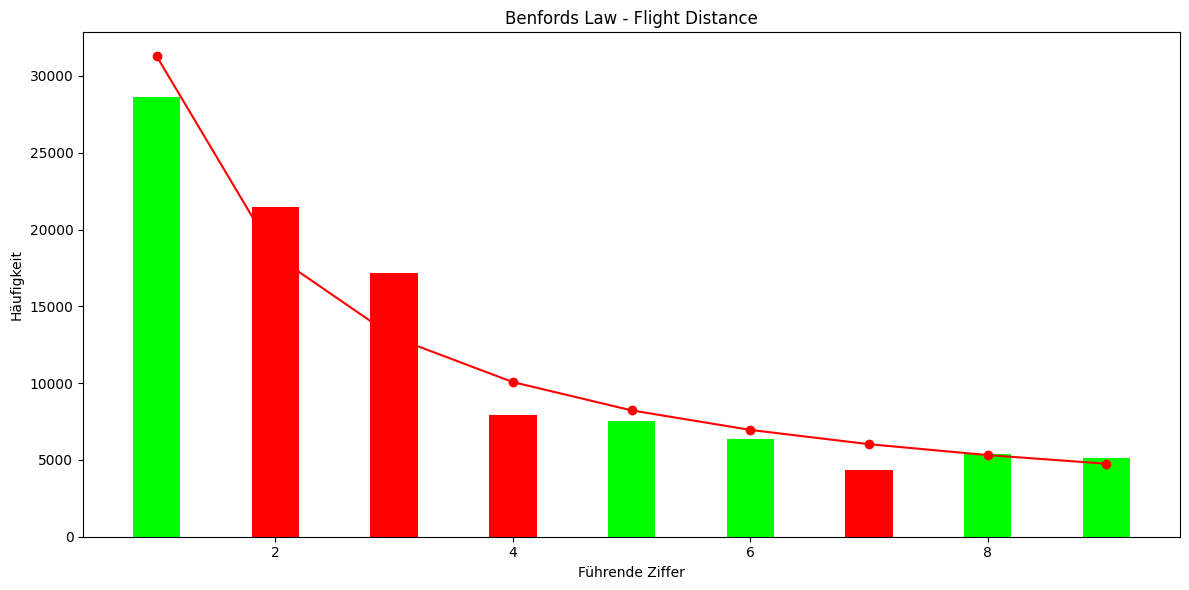

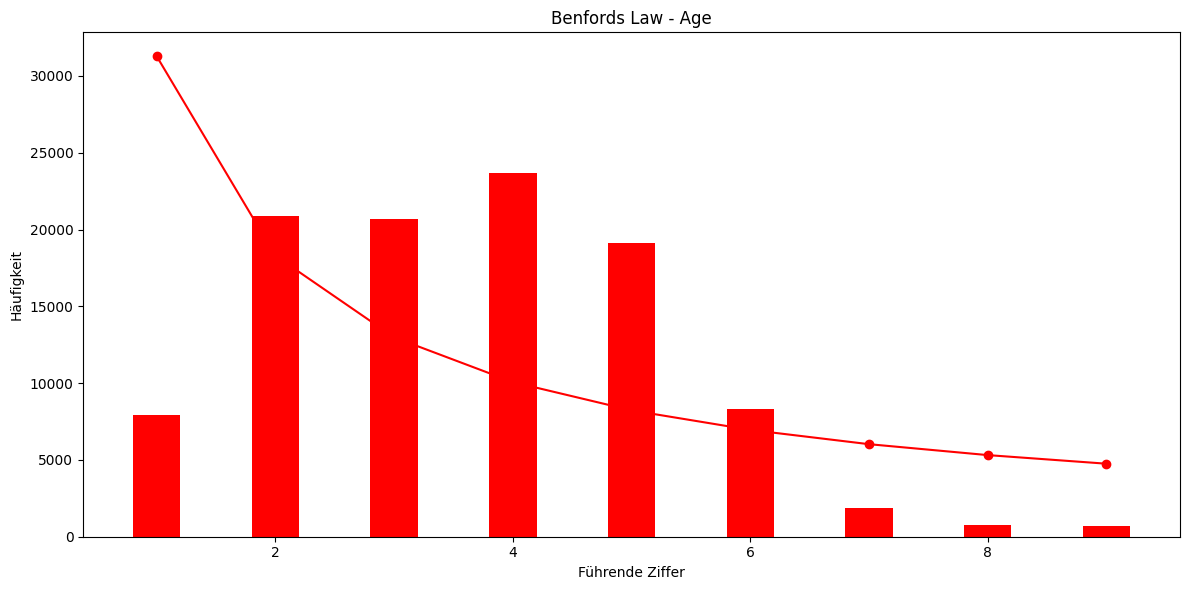

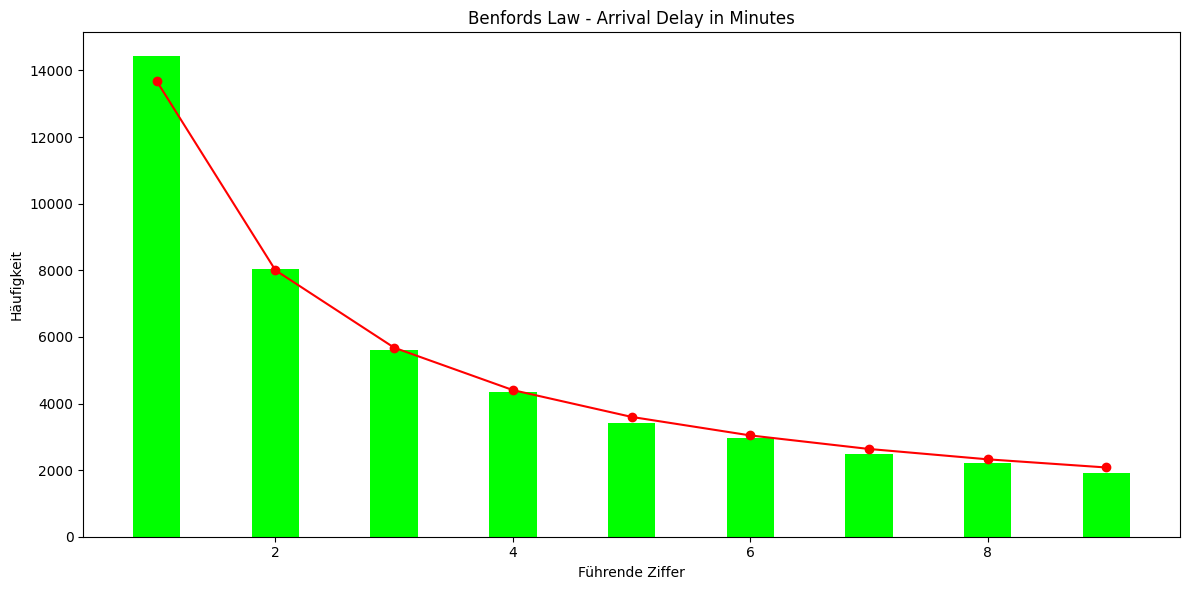

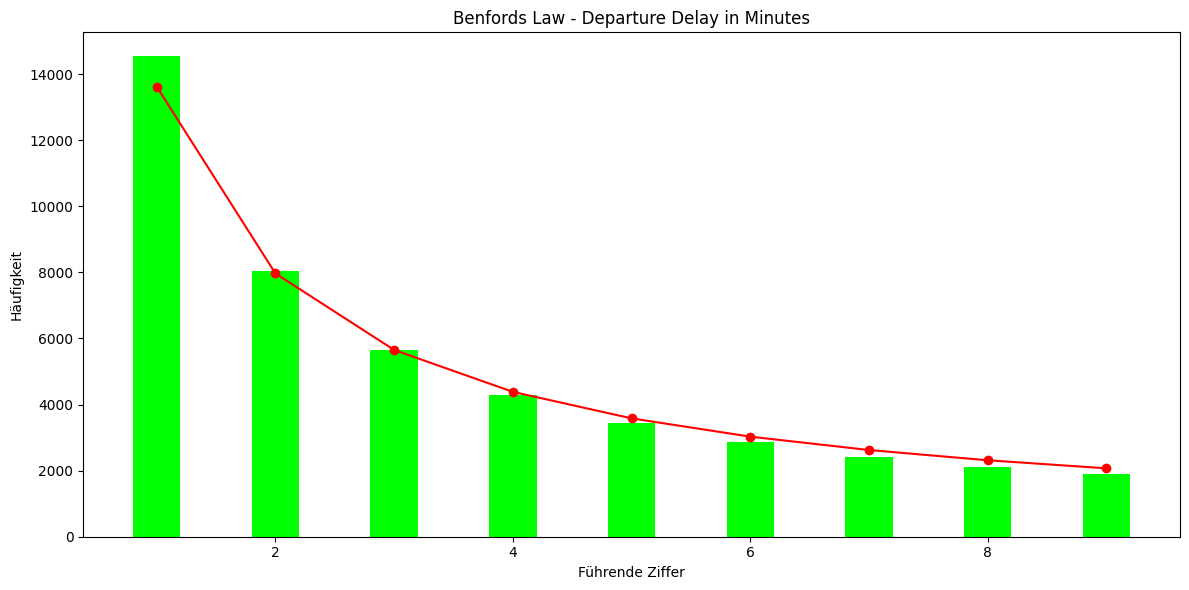

In [261]:
# Matplotlib wird für die Visualisierung importiert
import matplotlib.pyplot as plt     

columns = ["Flight Distance","Age","Arrival Delay in Minutes", "Departure Delay in Minutes"]


for column in columns:

    values = df[column]
    values = values[values > 0]

    # Extrahieren der führenden Ziffern
    leading = values.astype(str).str[0].astype(int)
    
    # Häufigkeiten der führenden Ziffern berechnen
    observed_counts = leading.value_counts().sort_index()
    
    # Benfordslaw Verteilungs erstellung
    benford = pd.Series({d: np.log10(1+1/d) for d in range(1,10)})* len(leading)

    # Farben basierend auf Abweichung von Benford
    colors = ["Lime" if abs(observed_counts[i]- benford[i])/ benford[i] < 0.1 else "Red" for i in range(1,10)]

    plt.figure(figsize=[12,6])
    plt.bar(observed_counts.index ,observed_counts.values, width = 0.4, label = "Beobachtet", color = colors)


    plt.plot(observed_counts.index  , benford, 'ro-' ,label = "Benford")
    plt.xlabel("Führende Ziffer")
    plt.ylabel("Häufigkeit")
    plt.title(f"Benfords Law - {column}")
    plt.tight_layout()
    plt.show()



   

## Ergebnisse: Folgen die Daten Benford?
Da eine Zahlenverteilung, die dem Benford-Gesetz nicht exakt entspricht, streng genommen nicht als vollständig benford-konform gelten kann, wurde festgelegt, dass eine Verteilung als benford-konform betrachtet wird, wenn die mittlere Abweichung unter 10 % liegt. Auf dieser Grundlage ergibt sich ein erstes Indiz dafür, dass unser Datensatz nicht manipuliert wurde und die Daten als glaubwürdig eingestuft werden können.


### 1.Flight Distance
- Bei der Auswertung zeigt sich ein abnehmender Trend wie bei Benford, dieser ist jedoch zu Beginn deutlich schwächer ausgeprägt.

### 2.Age
- Die Variable Age zeigt keinerlei Übereinstimmung mit Benfords Law und folgt eher einer Normalverteilung. Davon war von auszugehen, da die Altersverteilung natürlich nicht dem Benfords Law folgt.

### 3.Arrival Delay in Minutes und 4.Departure Delay in Minutes
- Sowohl Arrival als auch Departure Delay folgen konsequent dem Benfords Law.

### Fazit

Insgesamt wirken die Daten plausibel. Nicht alle Spalten entsprechen dem Benfords Law, was bei Variablen wie dem Alter ganz normal ist. Wichtig ist, dass keine ungewöhnlichen oder auffälligen Muster erkennbar sind. Besonders die Verzögerungszeiten passen gut zu Benford.

Damit gibt es keine Hinweise auf künstliche Veränderungen oder manipulierte Daten. Der Datensatz wirkt stimmig und realistisch. 

# 5 Korrelationen

Ein zentraler Bestandteil für die Beantwortung der Forschungsfrage ist, die Korrelationen zu überprüfen.

### 5.1.1 Auswahl geeigneter Korrelationskoeffizienten

Basierend auf den Skalenniveaus in unserem Datensatz ergeben sich folgende Zuordnungen:

| Variablentyp / Skalenniveau           | Beispielmerkmale                                 | Geeigneter Korrelationskoeffizient |
|---------------------------------------|--------------------------------------------------|------------------------------------|
| Kardinal – Kardinal               | Flight Distance, Departure Delay, Age            | Bravais-Pearson-Korrelationskoeffizient |
| Ordinal – Ordinal                 | Seat comfort, Food and drink, Cleanliness        | Spearmans Korrelationskoeffizient       |
| Nominal – Nominal                 | Gender, Type of Travel, Customer Type, satisfaction | Chi-Quadrat-Koeffizient (mit Kontingenztabelle), Cramer´s V|

### 5.1.2 Vermutungen und deren Prüfung

1. Es besteht eine Korrelation zwischen dem Sitzkomfort und der Zufriedenheit eines Passagiers. 


Methode: Spearman (ordinal)

In [262]:
# satisfaction in binäre Form umwandeln (1 = zufrieden, 0 = unzufrieden)
df_copy = df.copy()
df_copy['satisfaction_bin'] = df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

df_copy[['Seat comfort', 'satisfaction_bin']].corr(method='spearman')
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

Ergebnis: Die Korrelation von 0.36 bestätigt einen moderaten positiven Zusammenhang. Je höher der Sitzkomfort bewertet wird, desto zufriedener sind die Passagiere.  
Die Vermutung wird damit bestätigt.

2. Es besteht eine Korrelation zwischen der Flugdistanz und den Verspätungsmerkmalen.

Methode: Bravais–Pearson (kardinal)

In [263]:
df[['Flight Distance', 'Departure Delay in Minutes']].corr(method='pearson')

,Flight Distance,Departure Delay in Minutes
Flight Distance,1.000000,0.002158
Departure Delay in Minutes,0.002158,1.000000


Ergebnis: Der Korrelationswert liegt mit 0.002 praktisch bei 0.  
Es gibt also keinen linearen Zusammenhang zwischen Flugdistanz und Abflugverspätung.  
Längere Flüge starten demnach nicht häufiger verspätet als kürzere.

Damit wird unsere ursprüngliche Vermutung widerlegt.

3. Es besteht keine Korrelation zwischen dem Geschlecht und der Zufriedenheit.

Methode: Chi-Quadrat-Test + Cramer’s V (nominal)

In [264]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Kontingenztabelle erstellen
ct = pd.crosstab(df['Gender'], df['satisfaction'])

# Chi-Quadrat-Test durchführen
chi2, p, dof, expected = chi2_contingency(ct)

# Cramer's V berechnen
n = ct.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(ct.shape) - 1)))

print("Chi-Quadrat:", chi2)
print("p-Wert:", p)
print("Cramer's V:", cramers_v)


Chi-Quadrat: 15.44441742614322
p-Wert: 8.496755458033522e-05
Cramer's V: 0.012191850597584968


Ergebnis: Der p-Wert liegt deutlich unter 0.05, also besteht ein statistisch signifikanter Unterschied.
Allerdings ist Cramer’s V mit 0.01 extrem niedrig, was auf einen sehr schwachen Effekt hinweist.
Praktisch gibt es also keinen relevanten Unterschied in der Zufriedenheit zwischen Männern und Frauen.

### 5.2 Korrelationsmatrix zwischen Bewertungen
Nun wollen wir die Korrelation zwischen allen Bewertungen beobachten. Am besten gelingt uns dies mit einer Korrelationsmatrix. Hierfür unterteilen wir die Korrelationen zweier Variablen in stark (grün), mittelstark (blau) und schwach (rot).



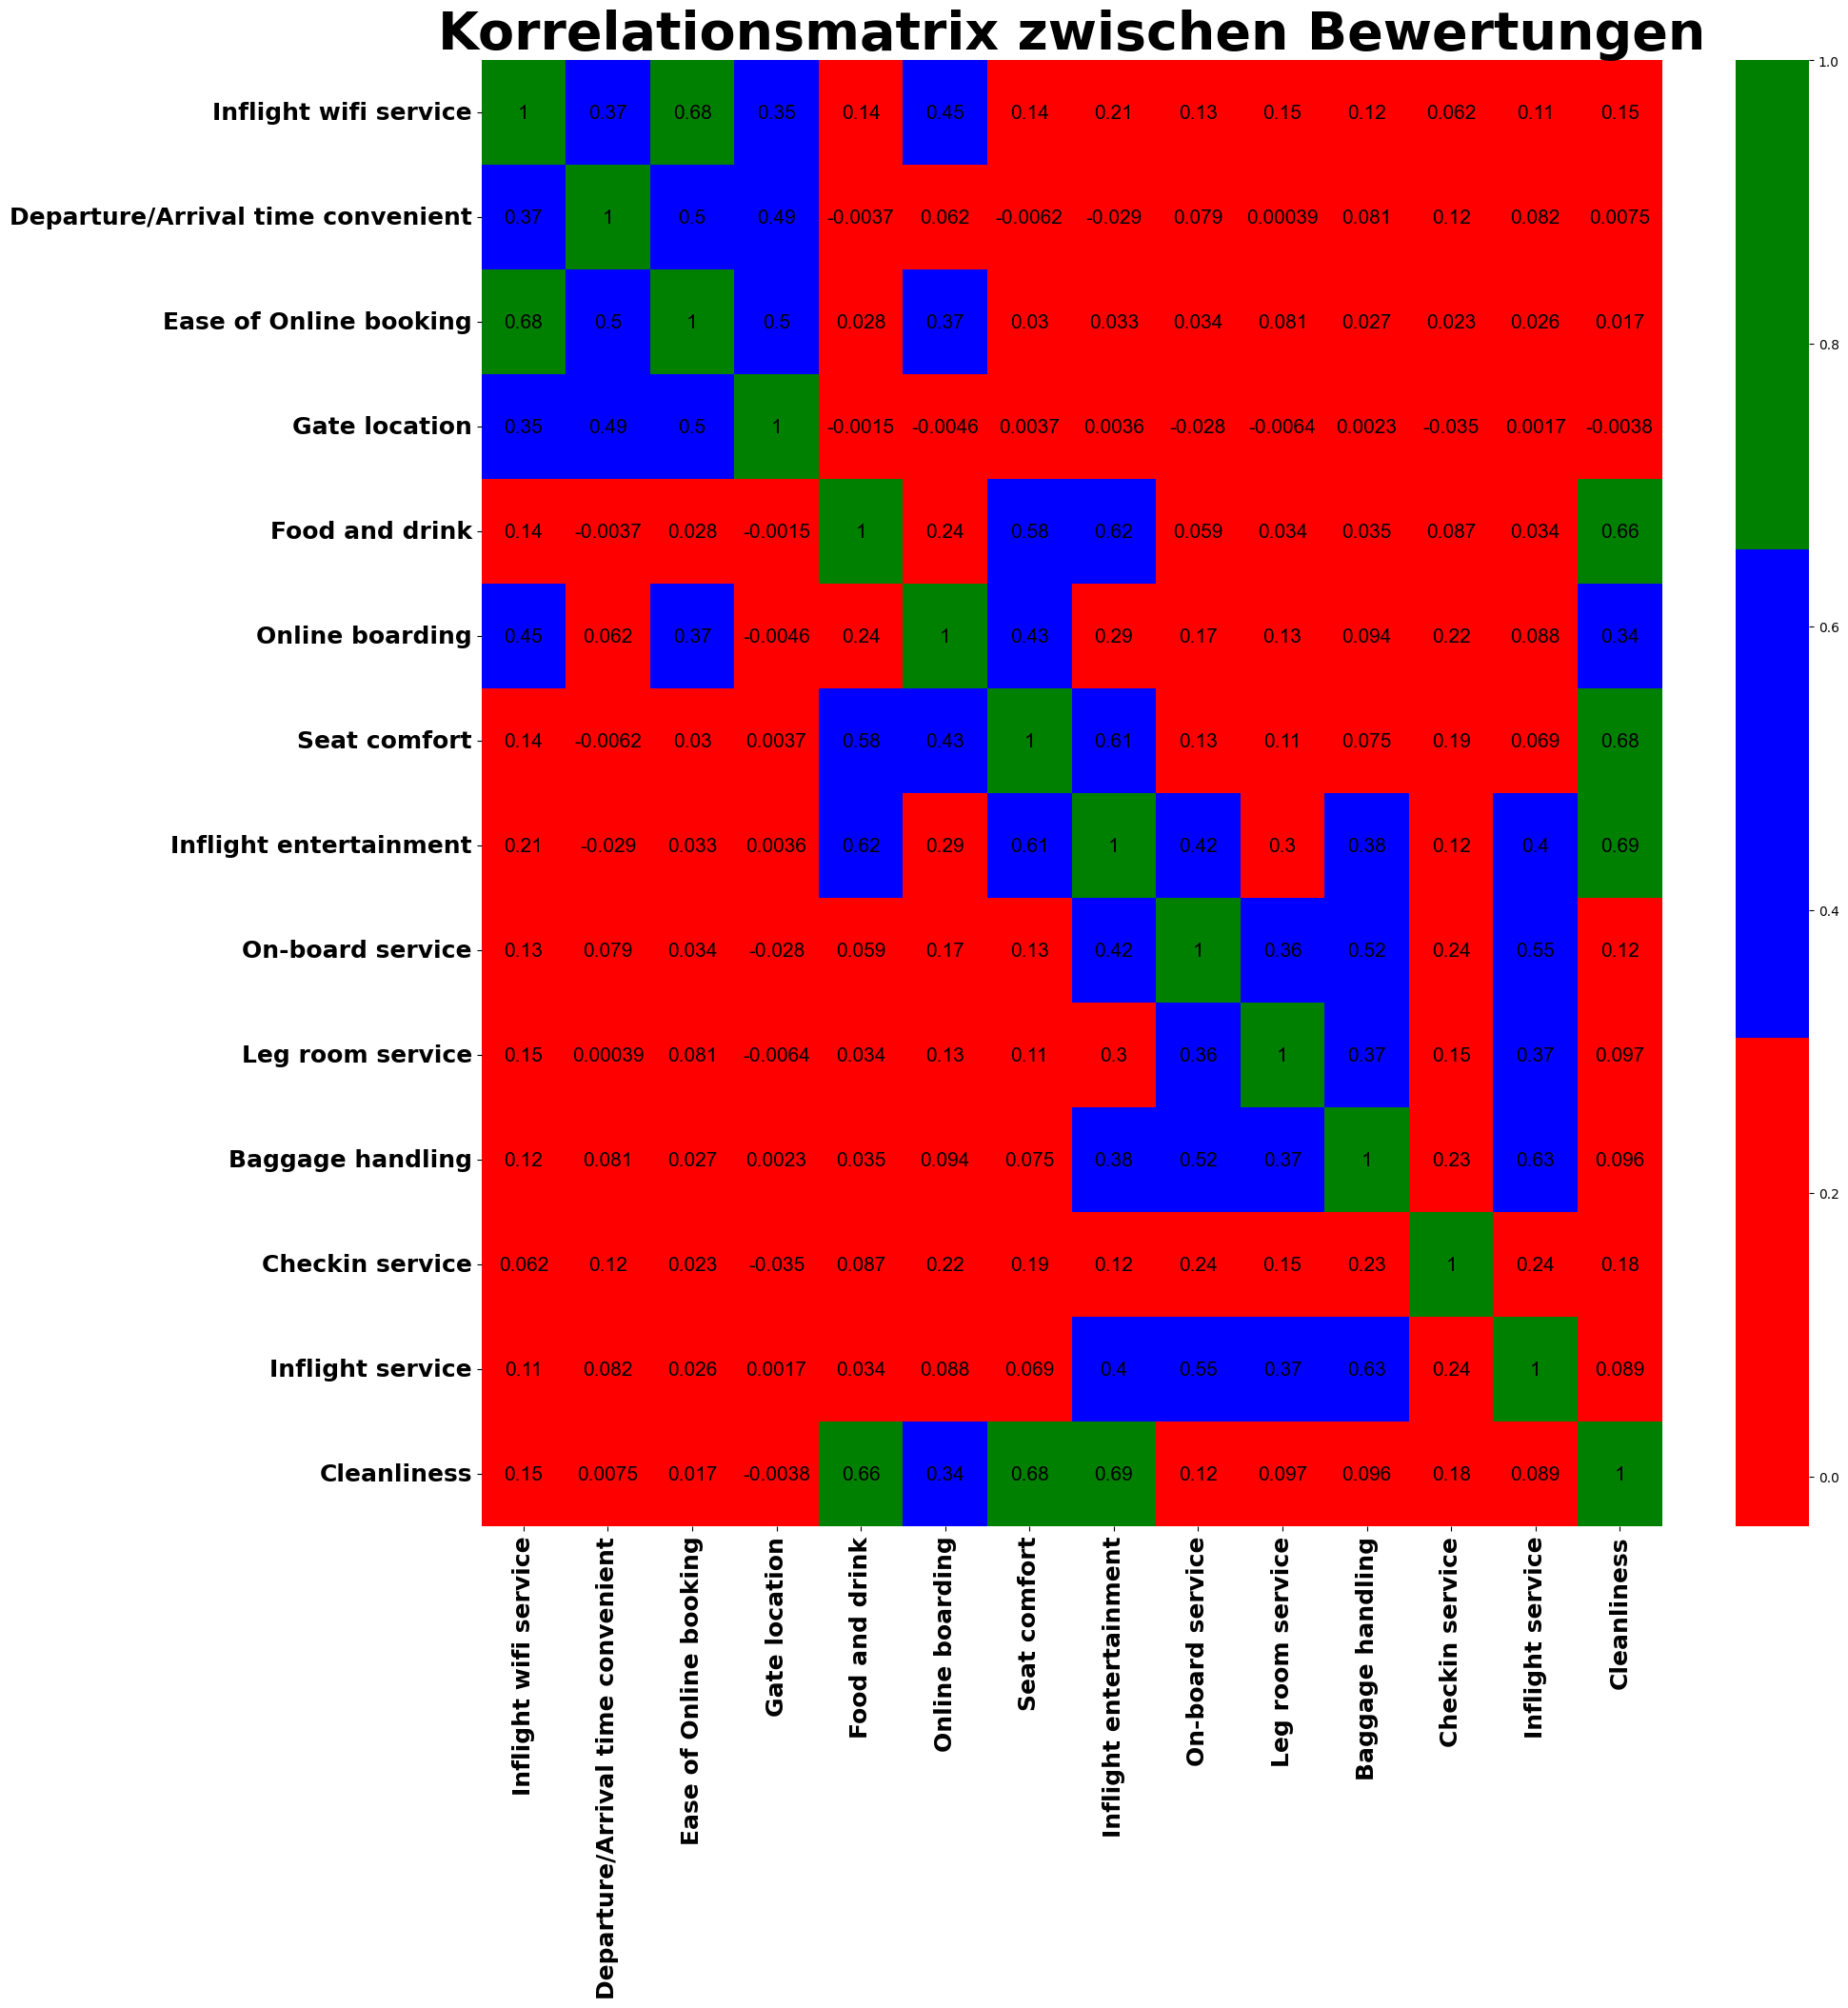

In [265]:
num_cols = df.select_dtypes(include=np.number).columns.drop(["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"])
corr = df[num_cols].corr()
plt.figure(figsize=[20, 20])
sns.heatmap(corr, annot=True, cmap=["Red", "Blue", "Green"],
            annot_kws={"size": 15, "fontname": "Arial", "color": "black"})
plt.title("Korrelationsmatrix zwischen Bewertungen", fontsize=40, fontweight="bold")
plt.xticks(rotation=90)

# Achsenbeschriftungen größer machen
plt.xticks(fontsize=18, fontweight="bold", rotation=90)
plt.yticks(fontsize=18, fontweight="bold", rotation=0)

plt.show()

## Analyse der Korrelationsmatrix

### 1. Digitale Services
Moderate Korrelationen zwischen: 
Inflight Wifi Service, Ease of Online Booking, Online Boarding, Departure/Arrival time convenient, Gate Location

Airlines, die in digitale Services investieren, bieten ein optimiertes Passagiererlebnis. reibungslose Buchung, gutes WLAN, leicht erreichbare Gates und pünktliche Zeiten steigern die wahrgenommene Qualität.

### 2. Komfort & Ausstattung
Signifikante Korrelationen zwischen:
Seat Comfort, Leg Room Service, Inflight Entertainment, Food and Drink, Cleanliness  
  
Physischer Komfort, Hygiene und Ablenkung durch Entertainment/Essen verstärken das subjektive Wohlbefinden. Mängel an einer Stelle beeinflussen andere Bewertungen negativ.

### 3. Servicequalität
Moderate Korrelationen zwischen:
Inflight Service, On-Board Service, Baggage Handling

Das Kabinenpersonal beeinflusst Wahrnehmung von Bordservice und Gepäckhandling.  
Guter menschlicher Service erzeugt Halo-Effekt, der andere Serviceaspekte positiv färbt.

### 4. Checkin
Unsignifikante Korrelationenen mit Checkin Service.
  
Die Wahrnehmung ist unabhängig von anderen Faktoren, der Einfluss auf  das Gesamterlebnis ist eher isoliert.

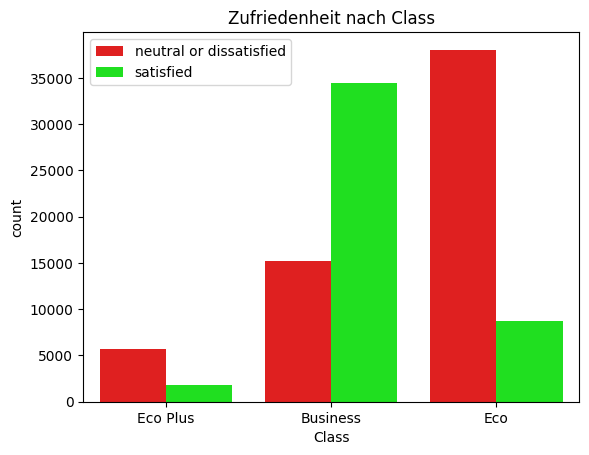

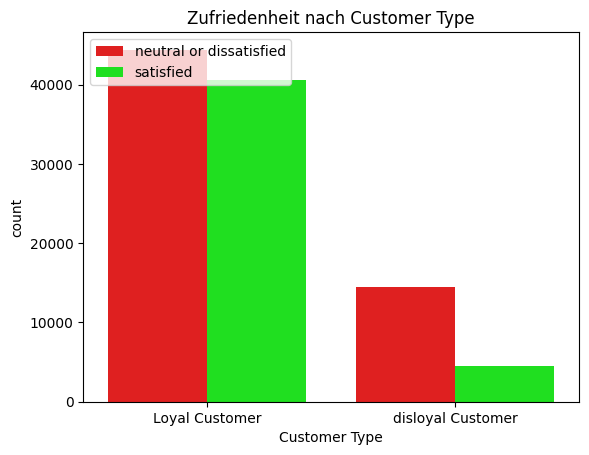

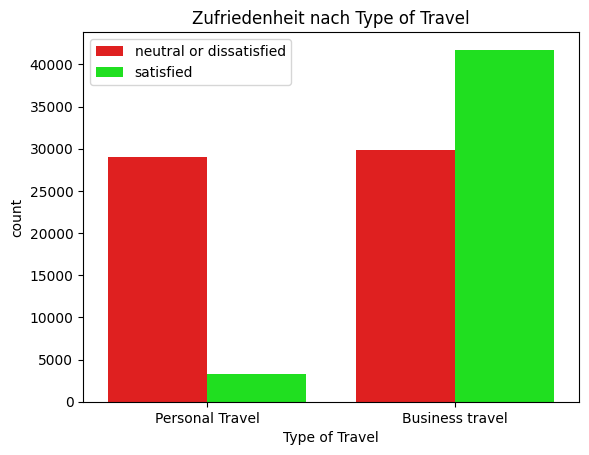

In [272]:
columns = ["Class","Customer Type","Type of Travel",] #Kategorische Variablen
for column in columns: # Schleife über die kategorischen Variablen
    sns.countplot(x= column, hue = "satisfaction", data = df, palette = ["red", "lime"]) # Erstellen des Countplots
    plt.title(f"Zufriedenheit nach {column}") # Titel des Plots
    plt.legend(loc = "upper left") # Legende oben links
    plt.show() # Anzeigen des Plots

Diese Balkendiagramme zeigen deutliche Unterschiede in der Kundenzufriedenheit in Verbindung mit der jeweils analysierten Kategorie.

Flugklasse: Die Business Class zeigt eine hohe Zufriedenheit, während die Economy Klassen deutlich unzufriedener sind.


Kundenart: Loyale Kunden sind signifikant zufriedener als disloyale Kunden.


Reisezweck: Business Travel weist eine hohe Zufriedenheit auf. Im Gegensatz dazu ist bei Personal Travel nur ein Bruchteil der Reisenden zufrieden, obwohl die Anzahl der Unzufriedenen von vergleichbarer Höhe ist.

### 5.4 Korrelationen zwischen numerischen Merkmalen und Zufriedenheit
In diesem Schritt betrachten wir die Zufriedenheitsvariable nochmal in ihrer binäre Form um und berechnen anschließend die linearen Korrelationen zwischen allen numerischen Merkmalen und der Zufriedenheit. Die Korrelationswerte werden sortiert und in einem Balkendiagramm dargestellt, um sichtbar zu machen, welche Faktoren positiv oder negativ mit der Kundenzufriedenheit zusammenhängen.

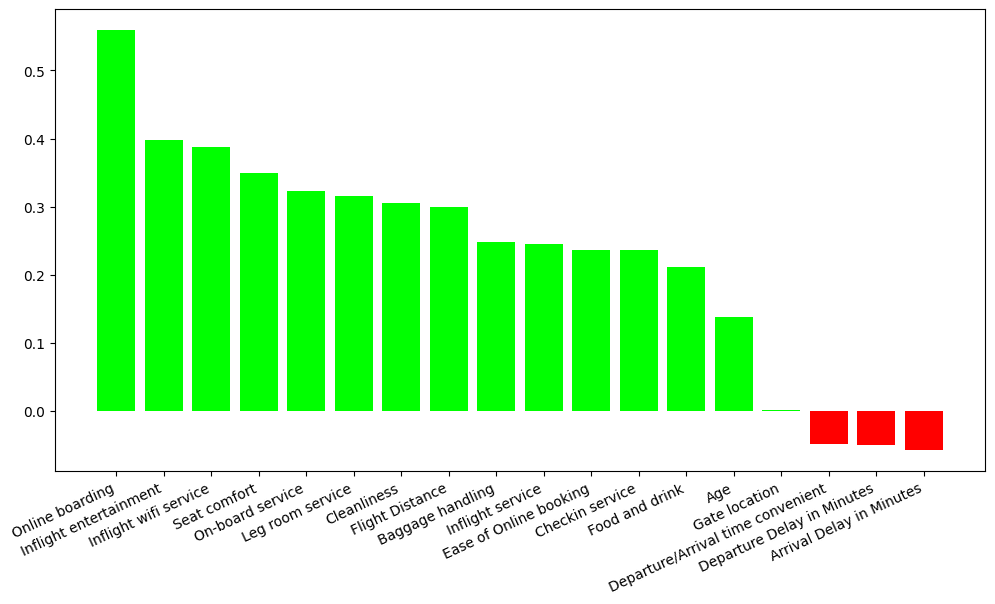

In [270]:
satisfaction_map = {
    "neutral or dissatisfied": 0,
    "satisfied":1
}

numeric_df= df.select_dtypes(include= ['int64', 'float64'])

correlations = numeric_df.corrwith(df["satisfaction"].map(satisfaction_map)).sort_values(ascending= False)

colors = ['lime' if v > 0 else 'red' for v in correlations]

plt.figure(figsize = [12,6])
plt.bar(correlations.index, correlations, color = colors)
plt.xticks(rotation = 25, ha = "right")
plt.show()

Die Analyse zeigt, dass vor allem der Online-Boarding-Prozess stark mit der Zufriedenheit zusammenhängt. Ein Wert von etwa 0.5 bedeutet, dass Menschen, die diesen Teil der Reise gut finden, insgesamt deutlich öfter zufrieden sind. Gleichzeitig sieht man, dass keine einzelne Variable eine perfekte Erklärung liefert – Zufriedenheit entsteht aus mehreren Bereichen zusammen.

Auf der anderen Seite wirken sich Verspätungen klar negativ aus. Wenn sich Ankunft oder Abflug verzögern, geben Passagiere wesentlich häufiger an, unzufrieden oder neutral zu sein. Das bestätigt, dass Delays ein echter Frustfaktor sind und die gesamte Reiseerfahrung spürbar beeinflussen.

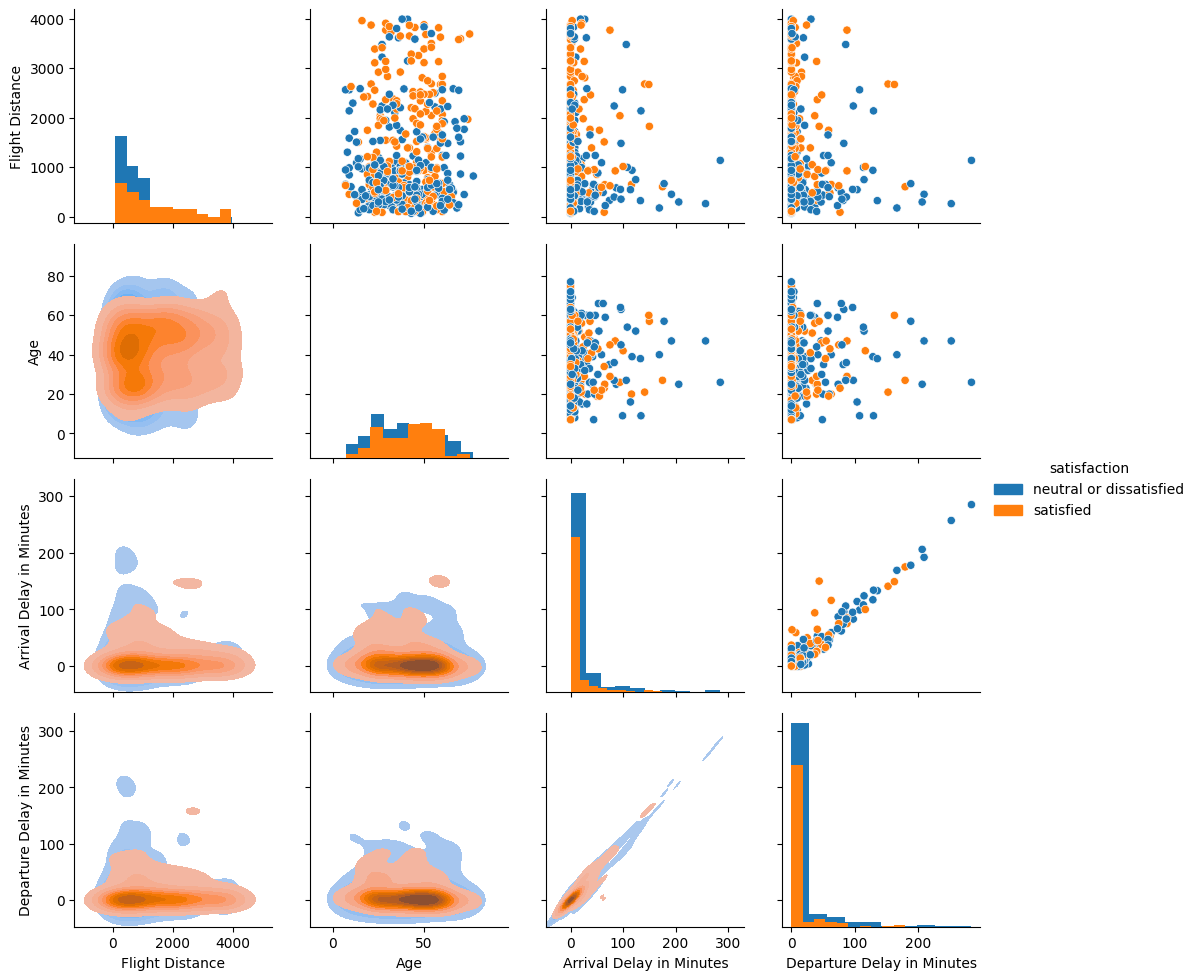

In [271]:
columns = ["Flight Distance","Age","Arrival Delay in Minutes", "Departure Delay in Minutes"] #Kardinale Variablen
sample_df = df.sample(n=500, random_state=42) # Zufällige Stichprobe von 500 Zeilen für die PairGrid-Visualisierung

giant_grid = sns.PairGrid(sample_df, hue = "satisfaction", vars = columns) # Erstellen des PairGrid
giant_grid.map_diag(plt.hist) # Erstellen der Histogramme auf der Diagonalen
giant_grid.map_upper(sns.scatterplot) # Erstellen der Scatterplots im oberen Dreieck
giant_grid.map_lower(sns.kdeplot, fill = True) # Erstellen der KDE-Plots im unteren Dreieck
giant_grid.add_legend() # Legende hinzufügen
plt.show() # Anzeigen des Plots

Dieses umfangreiche Pairplot bietet die Möglichkeit, mehrere unserer vorherigen Darstellungen wiederzuerkennen und alle relevanten Variablen noch einmal kompakt auf einen Blick zu betrachten. Besonders der KDE-Plot im unteren Dreieck liefert einen zusätzlichen Mehrwert: Durch die Dichtevisualisierung werden Überlagerungen und Muster deutlich erkennbarer als in reinen Scatterplots. Bereiche mit hoher Datendichte lassen sich so leichter identifizieren.

Zusammenfassend lässt sich sagen, dass dieses Plot vor allem als Übersichts- und Orientierungsinstrument sinnvoll ist. Es greift viele zuvor gezeigte Zusammenhänge erneut auf, jedoch in einer Form, die eher einen globalen Überblick erlaubt. Für die Analyse einzelner Werte oder feiner Details ist es weniger geeignet, da die Vielzahl der Datenpunkte die exakte Betrachtung erschwert.


# 6. Fazit und Beantwortung der Forschungsfrage

### 6.1 Rückblick auf die Forschungsfrage

Zu Beginn dieses Portfolios wurde folgende zentrale Forschungsfrage gestellt:
*"Welche Faktoren beeinflussen die Gesamtzufriedenheit eines Flugpassagiers am meisten und inwiefern korrelieren die einzelnen Faktoren miteinander?"*

Die durchgeführte Analyse des Datensatzes liefert hierauf klare Antworten und zeigt, dass die Zufriedenheit nicht von einem einzelnen Merkmal abhängt, sondern das Ergebnis eines Zusammenspiels aus digitalen Prozessen, physischem Komfort und Pünktlichkeit ist.

### 6.2 Hauptergebnisse der Analyse

**1. Einflussfaktoren auf die Gesamtzufriedenheit:**
Die Analyse der Korrelationen zeigt, dass Prozesse vor dem Flug wichtiger für die Zufriedenheit sind als das Erlebnis an Bord. Online Boarding weist den stärksten positiven Zusammenhang auf und ist ein zentraler Treiber für Zufriedenheit. Komfortfaktoren wie Inflight Entertainment, Seat Comfort und Leg Room Service wirken ebenfalls positiv. Verspätungen beeinflussen das Kundenerlebnis dagegen, wie zu erwarten, klar negativ. Geschlecht und Flugdistanz zeigen hingegen keinen relevanten Zusammenhang mit der Zufriedenheit.

**2. Korrelationen der Faktoren untereinander:**
Aus der Korrelationsmatrix wird zudem erkennbar, wie Passagiere unterschiedliche Servicebereiche wahrnehmen. Digitale Angebote wie Inflight Wifi, Online Booking und Online Boarding hängen eng zusammen und spiegeln die Qualität der IT-Infrastruktur wider. Beim physischen Wohlbefinden korrelieren Cleanliness, Food and Drink und Seat Comfort stark, was darauf hinweist, dass Sauberkeit als Indikator für die allgemeine Kabinenqualität dient. Zudem wirkt die Bewertung des Kabinenpersonals positiv auf Bereiche wie Baggage Handling und Inflight Service, was auf einen Halo-Effekt schließen lässt.

### 6.3 Datenqualität
Der bereits bereinigte Datensatz wurde mittels Benfords Law auf seine Glaubwürdigkeit überprüft und fehlende Werte passend ersetzt. 

### 6.4 Handlungsempfehlung
Um die Forschungsfrage abschließend in eine Empfehlung zu übersetzen: Airlines sollten ihre Ressourcen priorisiert sowohl in die Optimierung der digitalen Schnittstellen (App/Webseite für Boarding), als auch in den allgemeinen Komfort (zum Beispiel der Sauberkeit) investieren, da sie hier den größten Hebel für die Steigerung der Gesamtzufriedenheit haben. So kann langfristig die Kundenbindung und das Markenimage gesteigert werden.

### 6.5 Ausblick
Ein logischer nächster Schritt im Sinne des CRISP-DM-Prozesses wäre die Modellierung.

Auf Basis der identifizierten Korrelationen könnte ein Vorhersagemodell trainiert werden, um vorherzusagen, ob ein neuer Passagier zufrieden sein wird oder nicht. Ein solches Modell würde es Fluggesellschaften ermöglichen, proaktiv unzufriedene Kunden zu identifizieren und gezielt gegenzusteuern.
